<a href="https://colab.research.google.com/github/archangel2006/PYML-2025/blob/main/PYML5%20(Statistical%20Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data={'Age':[2,25,28,24,23,29,150,27,26,22]}
df=pd.DataFrame(data)

In [ ]:
print(df)

   Age
0    2
1   25
2   28
3   24
4   23
5   29
6  150
7   27
8   26
9   22


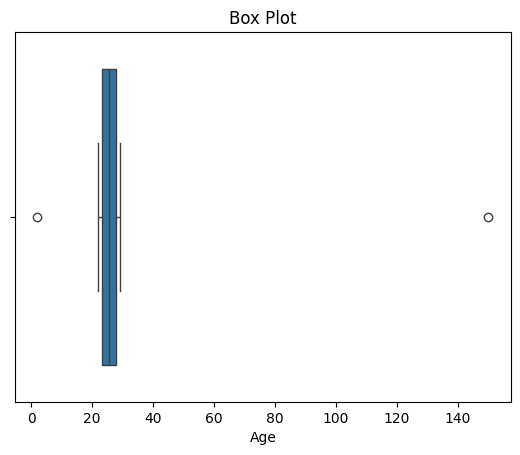

In [ ]:
sns.boxplot(x=df['Age'])
plt.title("Box Plot")
plt.show()

In [ ]:
df['Age'].describe()

,Age
count,10.000000
mean,35.600000
std,40.925949
min,2.000000
25%,23.250000
50%,25.500000
75%,27.750000
max,150.000000


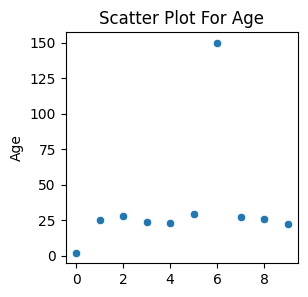

In [ ]:
fig=plt.figure(figsize=(3,3))
sns.scatterplot(x=range(len(df['Age'])),y=df['Age'])
plt.title('Scatter Plot For Age')
plt.show()

<Axes: >

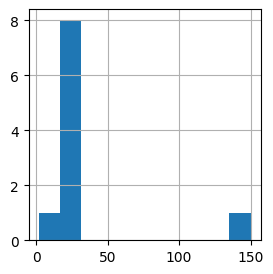

In [ ]:
fig=plt.figure(figsize=(3,3))
df['Age'].hist(bins=10)

# Statistical


In [ ]:
from scipy import stats

In [ ]:
z=np.abs(stats.zscore(df['Age']))
print(f'Z-Scores:{z}')

Z-Scores:[0.86540472 0.27301458 0.19574631 0.29877068 0.32452677 0.16999021
 2.94649702 0.2215024  0.24725849 0.35028286]


In [ ]:
outliers=df[z>3]
print(f'Outliners: {outliers}')

Outliners: Empty DataFrame
Columns: [Age]
Index: []


In [ ]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR= Q3-Q1
lower_bound=Q1 - 1.5*IQR
upper_bound=Q3 +1.5*IQR

outliers=df[(df['Age']<lower_bound)|(df['Age']>upper_bound)]
print(f'Outliers: {outliers}')

Outliers:    Age
0    2
6  150


In [ ]:
df_cleaned=df[(df['Age']>lower_bound)&(df['Age']<upper_bound)]
print(df_cleaned)

   Age
1   25
2   28
3   24
4   23
5   29
7   27
8   26
9   22


In [ ]:
df['Age']=np.where((df['Age']<lower_bound)|(df['Age']>upper_bound),df['Age'].median(),df['Age'])
print(df)

    Age
0  25.5
1  25.0
2  28.0
3  24.0
4  23.0
5  29.0
6  25.5
7  27.0
8  26.0
9  22.0
